In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales-prediction/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
# Display the column names
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


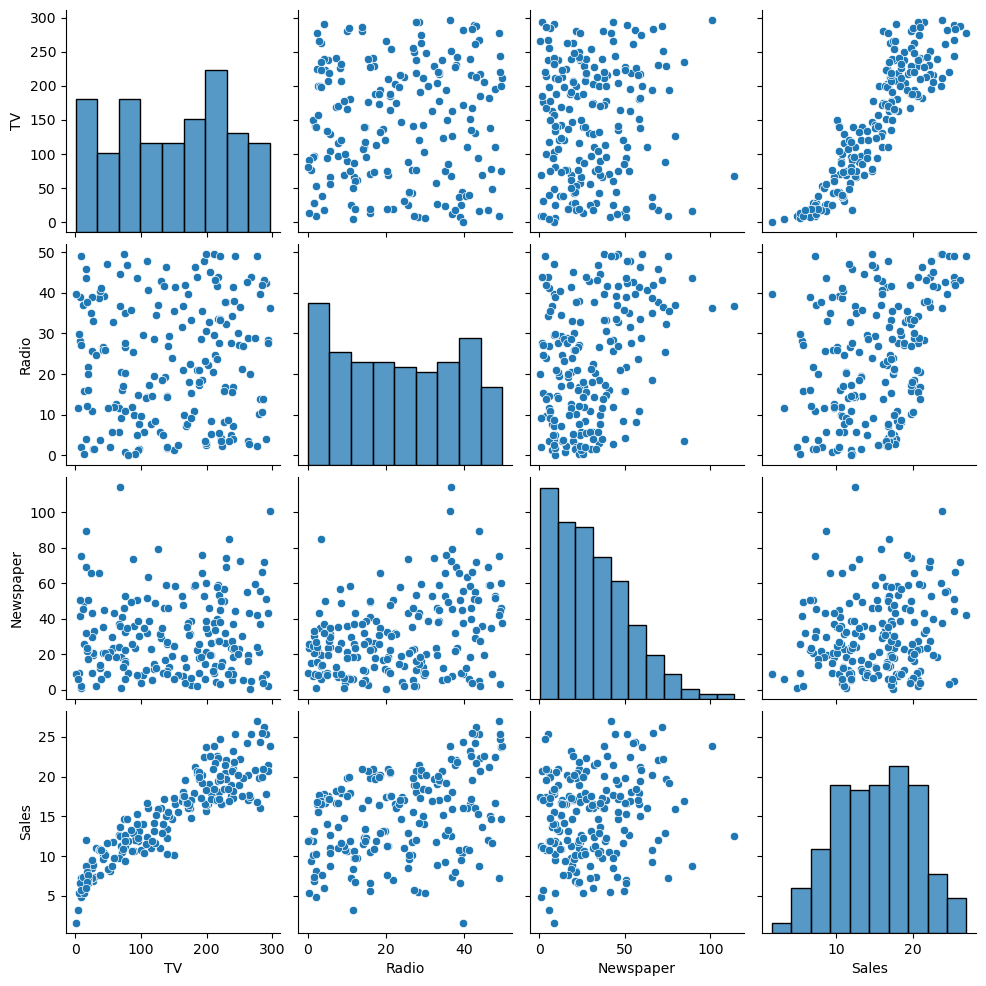

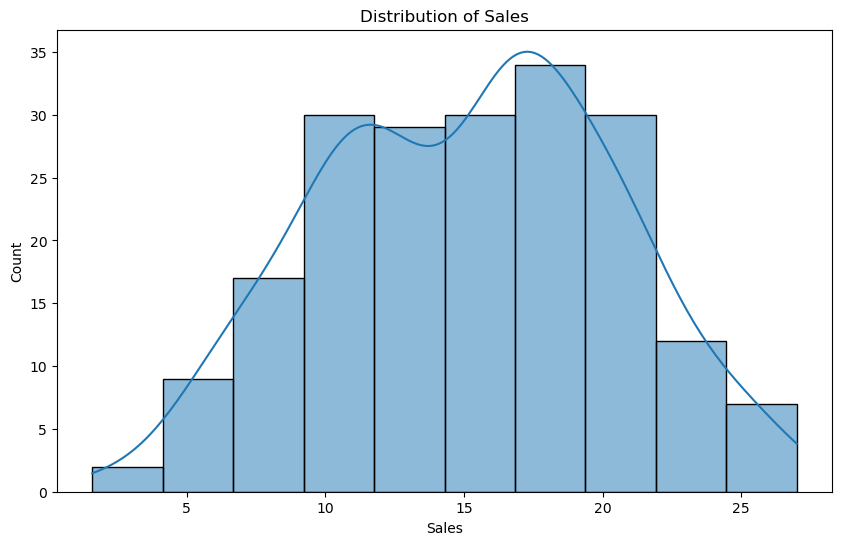

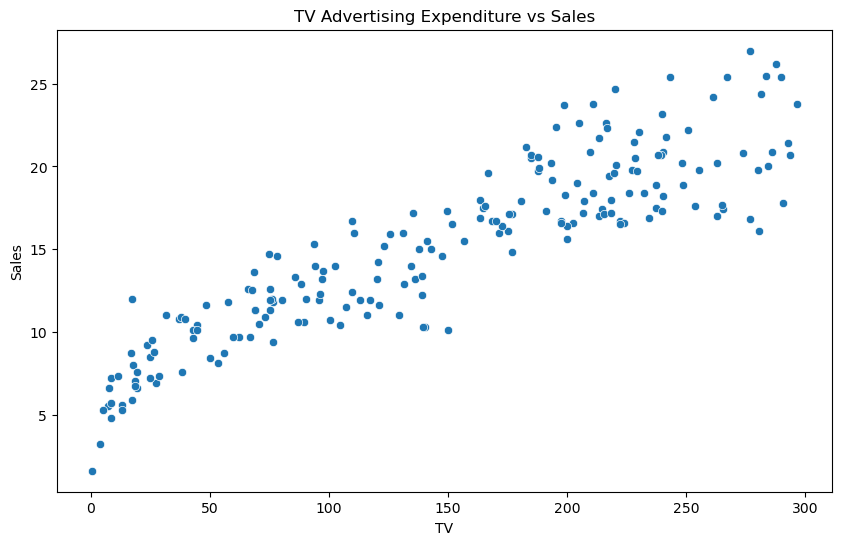

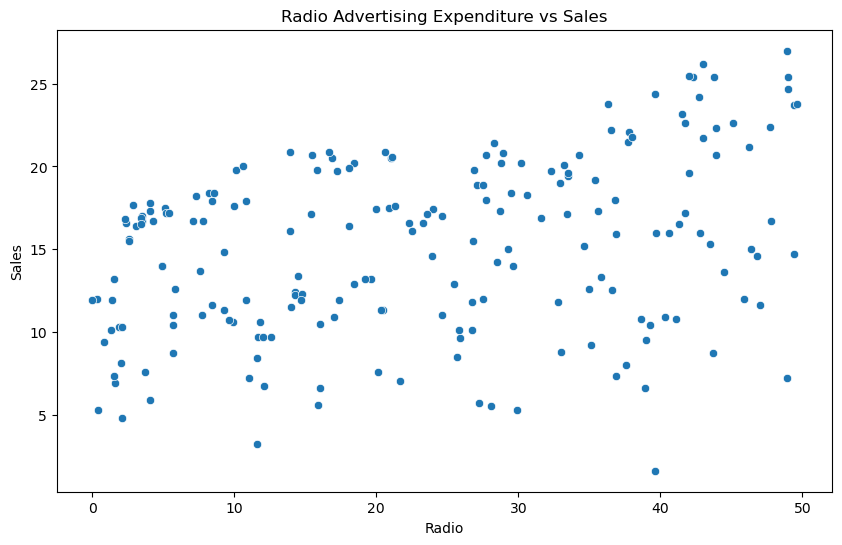

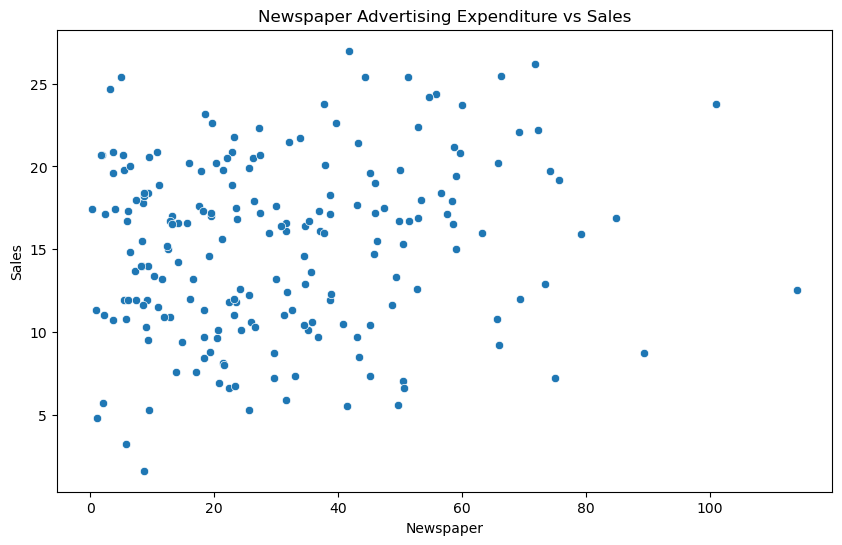

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

# Scatterplot of Advertising Expenditure vs Sales (for each medium)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV Advertising Expenditure vs Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio Advertising Expenditure vs Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising Expenditure vs Sales')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

{'Mean Squared Error': 2.907756910271093, 'R^2 Score': 0.9059011844150825}


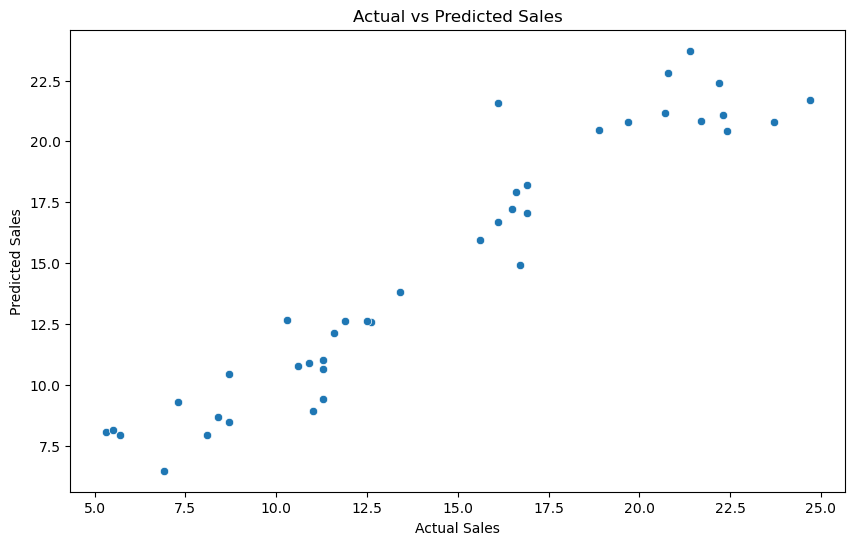

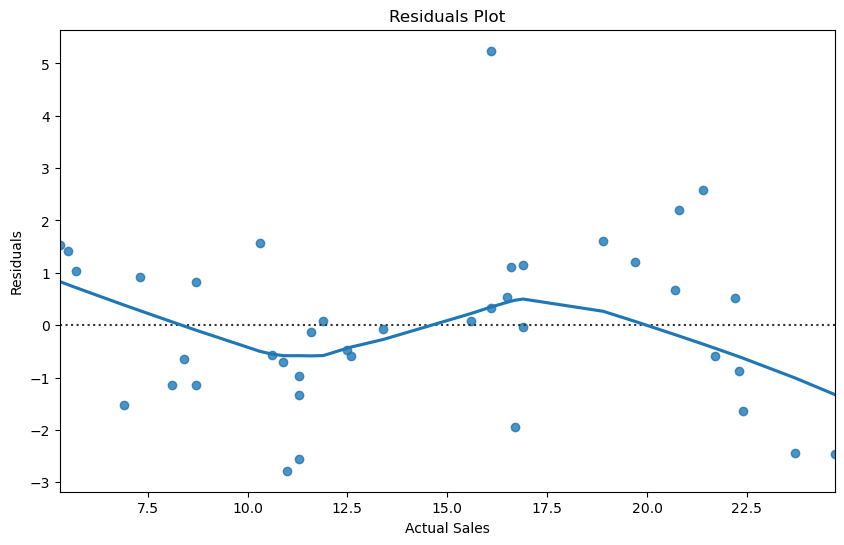

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

evaluation_metrics = {
    'Mean Squared Error': mse,
    'R^2 Score': r2
}

# Print evaluation metrics
print(evaluation_metrics)

# Scatterplot of Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Residuals Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
